In [1]:
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Use 'yfinance' instead of 'pandas_datareader' to fetch data
!pip install yfinance
import yfinance as yf

# Fetch data using yfinance
df = yf.download('AAPL', start='2012-01-01', end='2024-01-01')

# Print the head of the dataframe to verify
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.416985  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.483713  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.622306  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.754257  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.734026  394024400


In [2]:
df = yf.download('AAPL', start='2012-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416985,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483713,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754257,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734026,394024400


Text(0, 0.5, 'Close Price USD ($)')

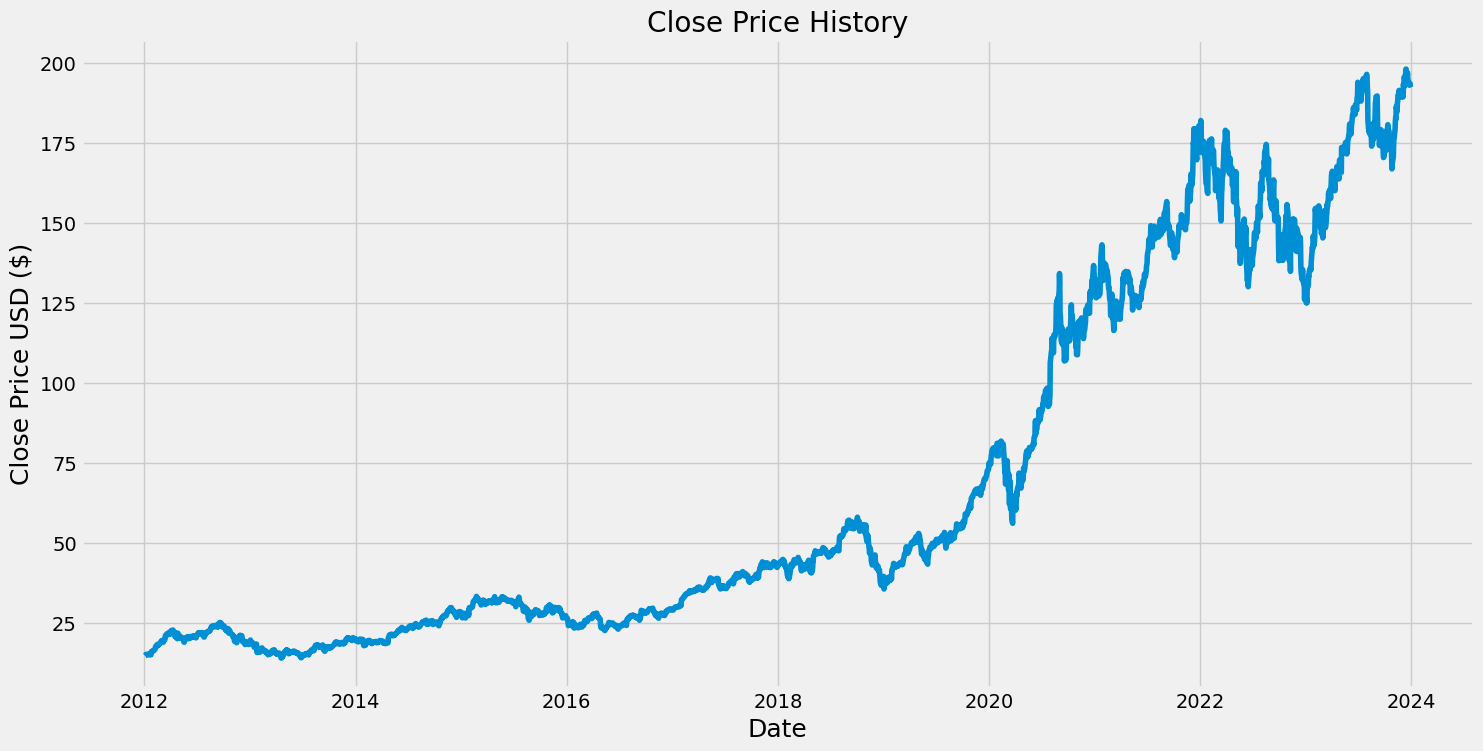

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [6]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=int(np.ceil(len(dataset)*.8))
training_data_len

2415

In [7]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.97306723],
       [0.97540217],
       [0.96970066]])

In [8]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [9]:
#convert x_train and y_train into numpay array
x_train,y_train=np.array(x_train),np.array(y_train)
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2355, 60, 1)

In [10]:
#build lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2355/2355 [==============================] - 84s 33ms/step - loss: 8.6750e-04


In [13]:
#creating testing data
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [14]:
#Converting data to numpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [15]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 [==============================] - 4s 33ms/step


In [16]:
#Get root mean square error
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

4.582911498962151

<ipython-input-18-cfcc68c20dd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


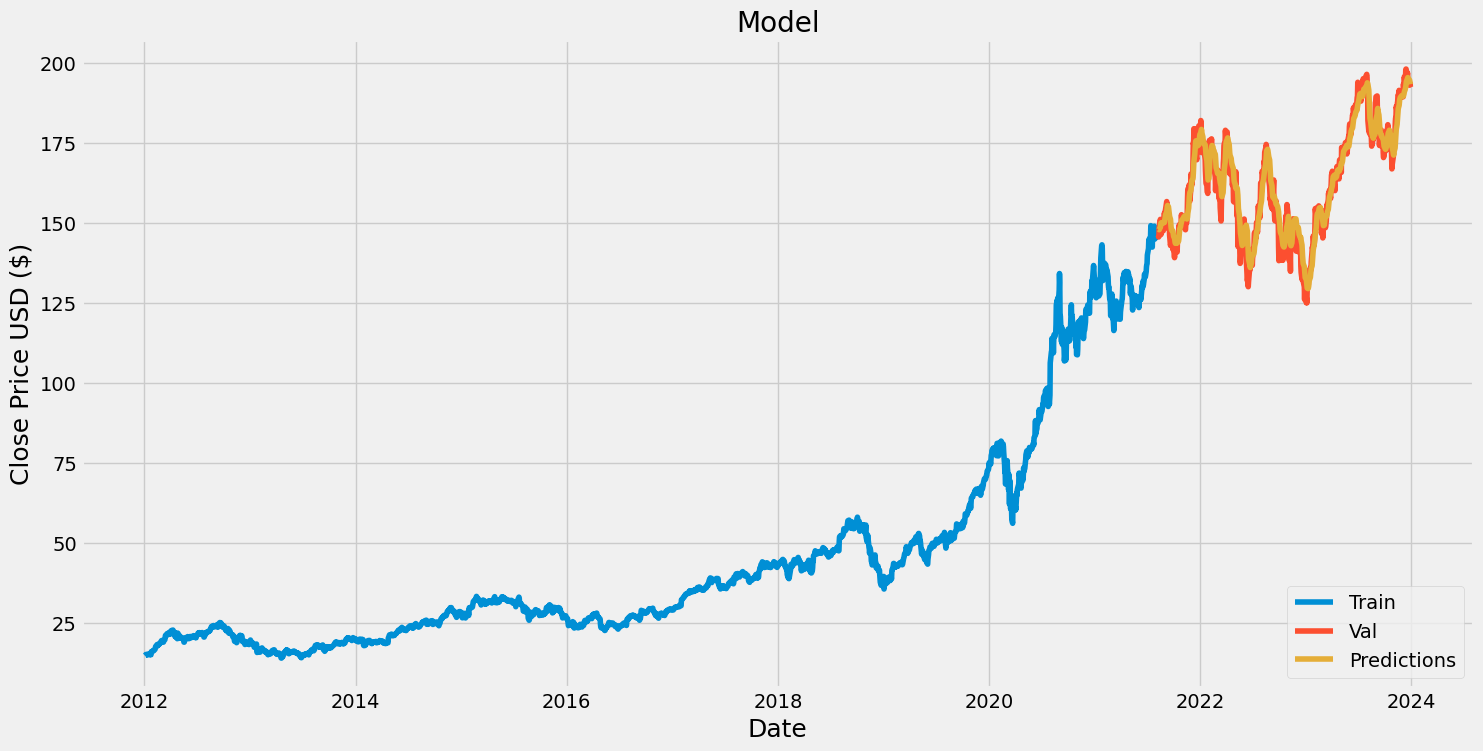

In [18]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [19]:
valid

,Close,Predictions
Date,,
2021-08-09,146.089996,148.163620
2021-08-10,145.600006,148.121796
2021-08-11,145.860001,147.996414
2021-08-12,148.889999,147.880539
2021-08-13,149.100006,148.157806
...,...,...
2023-12-22,193.600006,195.121063
2023-12-26,193.050003,194.700928
2023-12-27,193.149994,194.186142
